In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir("drive/MyDrive/project/soma")

In [ ]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install googletrans==4.0.0-rc1

# 저기어때 서비스 EDA

In [ ]:
import json
from collections import defaultdict
from wordcloud import WordCloud
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Mecab
from collections import Counter
from IPython.display import Image,display_png
import googletrans

## 데이터 전처리
구글 지도에서 가져온 하와이 식당 리뷰 데이터를 통해 휴양지에 방문하는 사람들의 니즈를 파악하고자 한다.

각 식당에서 10개 이상의 리뷰를 크롤링을 통해 가져온다.

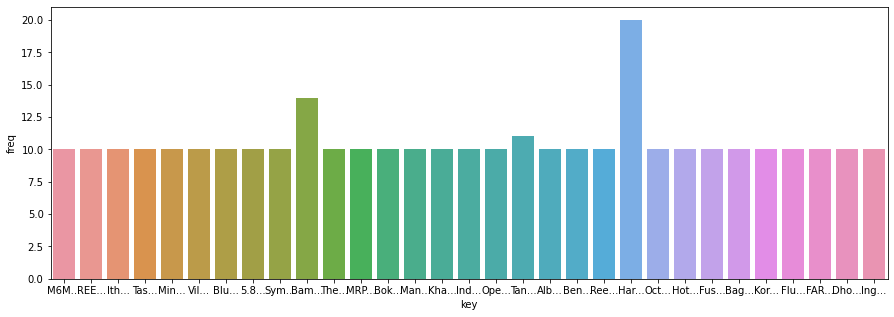

In [ ]:
with open("review.json", "r") as f:
  data = json.load(f)

df = defaultdict(list)
for key in data.keys():
  df["key"].append(key[:3] +"...")
  df["freq"].append(len(data[key]))
df = pd.DataFrame(df)

plt.figure(figsize=(15, 5))
sn.barplot(x="key", y="freq", data=df)
plt.show()

In [ ]:
data["M6M Restaurant"]

['(Google 번역 제공) 멋진 전망과 매우 호화로운 메뉴. 어린이는 목요일과 월요일 점심에만 이용할 수 있지만 미리 예약할 가치가 있습니다. Ozen life Maadhoo 단지의 일부입니다.\n\n(원문)\nGreat views and a very posh menu. Available for children only on Thusday and Monday lunch but worth to book in advance. Part of the Ozen life Maadhoo complex.',
 '(Google 번역 제공) 내 인생 최고의 식사 경험 중 하나입니다.\n\n호텔에서 4 박 이상 숙박하는 경우 식사는 호텔 올 인 클루 시브 패키지에 포함되어 있습니다.\n\n음식은 훌륭했고 음료 선택은 인상적이었습니다.\n\n그러나 나를 더 놀라게 한 것은 전체 식사 동안 물고기를 보는 것입니다.\n\n나는 기본적으로 음식을 잊고 우리 앞에서 배회하는 상어와 모든 종류의 물고기를 보는 데 몇 시간을 보낼 수 있습니다.\n\n정말해야 할 일!\n\n(원문)\nOne of the best meal experience I had in my life.\n\nThe meal is included in the hotel all inclusive package if you stay more than 4 nights in the hotel.\n\nThe food was amazing and the choice of drinks impressive.\n\nBut what amazes me more is the view of fishes during the whole meal.\n\nI could basically forget the food and just spend hours watching sharks and all sort of fishes roaming in front of us.\n\nReally a must do !',
 "(Google 번역 제공) 제 아내와 저는 

다양한 언어로 리뷰가 적혀있지만, 구글의 자동 번역 바탕으로 모든 리뷰를 한국어로 받아 올 수 있다. 아래와 같이 번역본에 해당하는 부분만 추출한다.

In [ ]:
texts = []
for key, val in data.items():
  for review in val:
    translated = review.split("(원문)")[0].strip()
    if translated == '':
      continue
    translated = translated.replace("(Google 번역 제공) ", "").replace("\n", "")
    texts.append(translated)
  
texts[:10]

['멋진 전망과 매우 호화로운 메뉴. 어린이는 목요일과 월요일 점심에만 이용할 수 있지만 미리 예약할 가치가 있습니다. Ozen life Maadhoo 단지의 일부입니다.',
 '내 인생 최고의 식사 경험 중 하나입니다.호텔에서 4 박 이상 숙박하는 경우 식사는 호텔 올 인 클루 시브 패키지에 포함되어 있습니다.음식은 훌륭했고 음료 선택은 인상적이었습니다.그러나 나를 더 놀라게 한 것은 전체 식사 동안 물고기를 보는 것입니다.나는 기본적으로 음식을 잊고 우리 앞에서 배회하는 상어와 모든 종류의 물고기를 보는 데 몇 시간을 보낼 수 있습니다.정말해야 할 일!',
 '제 아내와 저는 식도락가이며 M6M의 음식 표준과 서비스 수준에 깜짝 놀랐습니다. 디테일과 풍미에 대한 관심은 두 번째입니다. 마늘 버터 데친 랍스터에서 캐비어까지 ... 음식은 놀랍게도 우리가 먹어 본 최고의 음식입니다. 헤드 웨이터 MOOSA는 전체 메뉴를 주문하는 한 가능한 모든 것을 보장합니다. 셰프 Letheesh는 우리가 먹어 본 가장 재능있는 셰프 중 한 명입니다. 천재.',
 '나의 남편은 우리 신혼 여행 동안 몰디브에서 우리 지난 날에 놀람 점심을 위해 나를 데려 갔다. 그리고 그것은 우리들 쌍방을위한 놀랄만한 경험이었다!우리가 보트로 처음 도착한 이래로 직원들이 우리를 처음 돌봐 주었고, 도착시 샴페인을 주었고, 레스토랑이 오후 12시에 준비되기 전에 술집에 데려 갔고, 식당에 버기를 가져 갔고, 치즈 플래터를 먹었고, 수중 식당에 갔었습니다. 기대하지 않았다). 그리고 물고기가 우리 주변에서 수영했던 것을 보는 동안 놀랄만한 5 - 과정 점심을 먹었다!우리 각자는 다른 코스를 가질 수있게되어서 우리는 다른 것을 골랐다. 서로의 식사를 시도해 볼 수 있었다. 각 식사는 현지 해산물 및 수입 재료를 사용하여 조심스럽게 준비되었습니다. 초콜렛 구면에 개암 (hazelnut)과 초콜렛 케이크로 마무리했습니다. 서버가 따뜻한 녹은 초콜렛 소스를 부어 넣으면 녹습니다! 디저트를위한 셔벗을 먹

잘못 받아온 데이터를 제거하여 아래와 같은 양의 데이터를 가져 올 수 있다.

In [ ]:
"레스토랑 수: %d, 총 리뷰 수: %d" % (len(data.keys()), len(texts))

'레스토랑 수: 32, 총 리뷰 수: 324'

In [ ]:
all_text = " ".join(texts)
tokenizer = Mecab()
tags = tokenizer.pos(all_text)

"총 단어 수: %d" % len(tags)

'총 단어 수: 17831'

리뷰 데이터에 대한 인사이트를 얻기 위해 Mecab을 통해 형태소 분석을 한다.

In [ ]:
tags[:15]

[('멋진', 'VA+ETM'),
 ('전망', 'NNG'),
 ('과', 'JKB'),
 ('매우', 'MAG'),
 ('호화', 'NNG'),
 ('로운', 'XSA+ETM'),
 ('메뉴', 'NNG'),
 ('.', 'SY'),
 ('어린이', 'NNG'),
 ('는', 'JX'),
 ('목요일', 'NNG'),
 ('과', 'JC'),
 ('월요일', 'NNG'),
 ('점심', 'NNG'),
 ('에', 'JKB')]

## 결과 분석
리뷰에서 명사를 추출한 결과 예상 가능한 결과가 나왔다. 식당 리뷰인 만큼 음식에 대한 요구가 많았으며 그 다음으론 서비스에 대한 결과가 많이 나왔다. 분석을 우리 앱은 양질의 음식 및 서비스를 제공하는 업장을 고객들에게 추천할 필요가 있다.

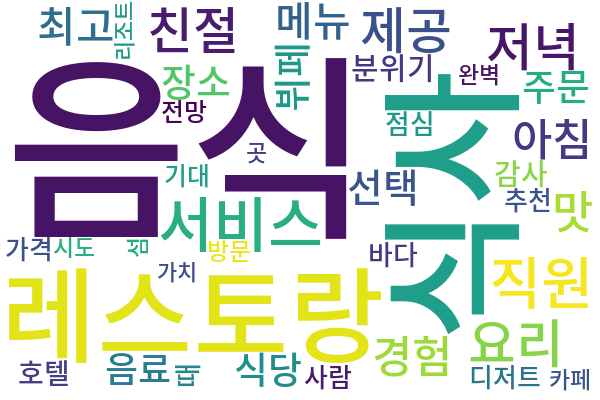

In [ ]:
nouns = filter(lambda x: x[1] == "NNG", tags)
cnt = Counter(x[0] for x in nouns)
wc = WordCloud(font_path="NotoSansKR-Medium.otf", background_color="white", width=600, height=400)
cloud = wc.generate_from_frequencies(dict(cnt.most_common(40)))
cloud.to_file("cloud.png")
display_png(Image('cloud.png'))

리뷰에서 형용사를 추출한 결과, "멋진"이나 "놀라운"과 같은 단어를 제외하고 기능적인 인사이트를 주는 단어로 "가까운"과 "비싼", 그리고 "새로운"이 있다. 저기어때에서 제공하는 예산 기반의 추천 시스템 및 동선 최적화 서비스가 이러한 소비자들의 요구를 만족할 수 있을 것으로 기대한다.

추가적으로 "새로운" 이라는 인사이트를 얻은 만큼, 사용자에게 널리 알려지진 않았지만 양질의 서비스를 제공하는 관광지 및 식당을 추천할 필요가 있다.

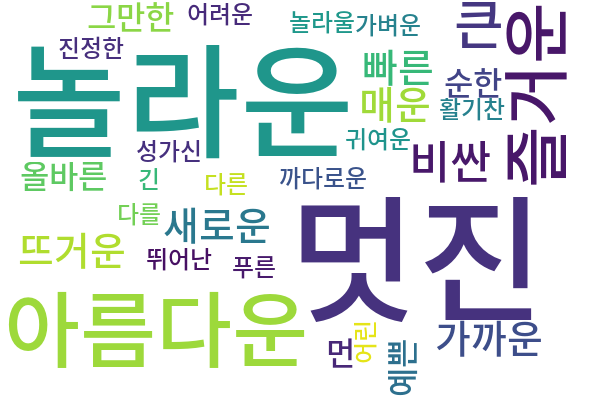

In [ ]:
adj = filter(lambda x: x[1] == "VA+ETM", tags)
cnt = Counter(x[0] for x in adj)
wc = WordCloud(font_path="NotoSansKR-Medium.otf", background_color="white", width=600, height=400)
cloud = wc.generate_from_frequencies(dict(cnt.most_common(40)))
cloud.to_file("cloud.png")
display_png(Image('cloud.png'))

기능적인 인사이트를 줄 수 있는 키워드에 대한 pie chart를 그려보아 각 키워드 별 사용자의 요구가 얼만큼이 있는지에 대한 비율을 확인해본다. 주어진 사용자의 요구의 100%를 만족하는 것을 목표로 서비스 구체화를 한다.

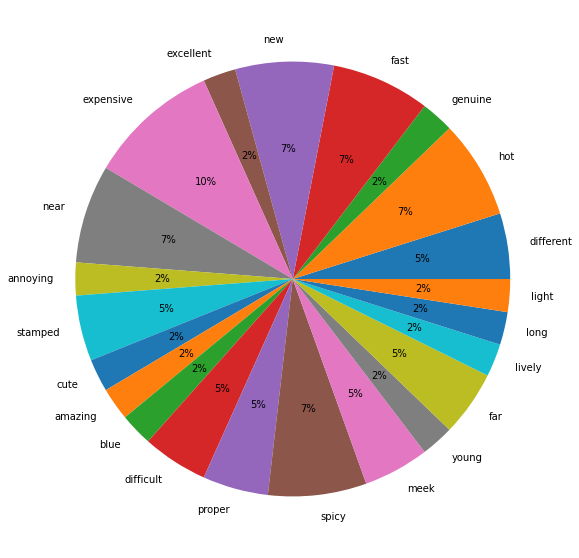

In [ ]:
translator = googletrans.Translator()

df = defaultdict(list)
for key, val in cnt.items():
  if key in ["멋진", "아름다운", "놀라운", "즐거운", "큰", "예쁜"]:continue
  translated = translator.translate(key, dest='en').text.lower()
  if translated in df["word"]:
    idx = df["word"].index(translated)
    df["freq"][idx] += val
  else:
    df["word"].append(translator.translate(key, dest='en').text.lower())
    df["freq"].append(val)
df = pd.DataFrame(df)

plt.figure(figsize=(10, 10))
plt.pie(df["freq"], labels=df["word"], autopct='%.0f%%')
plt.show()

구글 지도 정보를 통한 크롤링에서는 얻을 수 있는 정보가 제한적이었다. 아고다나 Booking.com의 API를 이용하여 더욱 다양한 데이터를 얻을 수 있다면 더 많은 인사이트를 얻을 수 있을것이다.

# 추가 분석
## N-Gram 분석
인사이트를 얻을만한 단어를 골라 주변에 어떤 단어들이 많아 나타나는지 확인해본다.

In [ ]:
def display_wc(cnt):
  unused = list(filter(lambda x: len(x) == 1 or x[-2:] == "니다", cnt.keys()))
  for key in unused:
    del cnt[key]
  wc = WordCloud(font_path="NotoSansKR-Medium.otf", background_color="white", width=600, height=400)
  cloud = wc.generate_from_frequencies(dict(cnt.most_common(40)))
  cloud.to_file("cloud.png")
  display_png(Image('cloud.png'))


def get_n_grams(tags, word, n):
  n_grams = []
  for i, tag in enumerate(tags):
    x, y = tag
    if x == word:
      n_gram = []
      for j in range(max(0, i - 2), min(len(tags) - 1, i + 3)):
        if j == i:continue
        a, b = tags[j]
        n_gram.append(a)
      n_grams.append(n_gram)
  return n_grams

service = get_n_grams(tags, "서비스", 2)
service[:5]

[['표준', '과', '수준', '에'],
 ['음식', '과', '는', '전반'],
 ['음식', '!', '는', '고급'],
 ['었', '고', '는', '훌륭'],
 ['음식', ',', '.', '..']]

"서비스" 단어엔 어떤 단어들이 나오는지 확인을 해 보았다. 대체적으로 직원과 친절에 관한 이야기가 있으며, 추가적으로 고급스러운 서비스를 원한다는 정보도 얻을 수 있다.

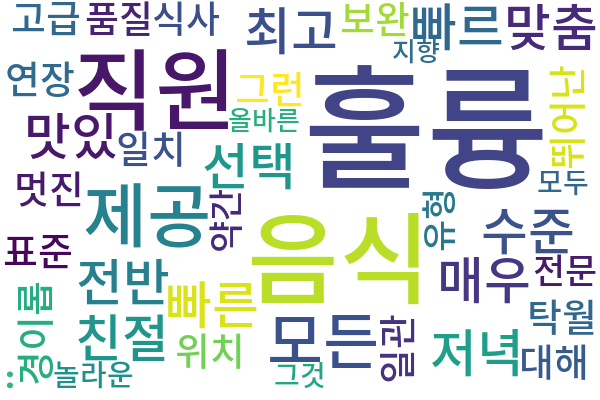

In [ ]:
cnt = []
for n_gram in service:
  cnt += n_gram
cnt = Counter(cnt)
display_wc(cnt)

"분위기" 키워드 주변의 단어로는 "멋진", "청결", "친절" 등이 있다.

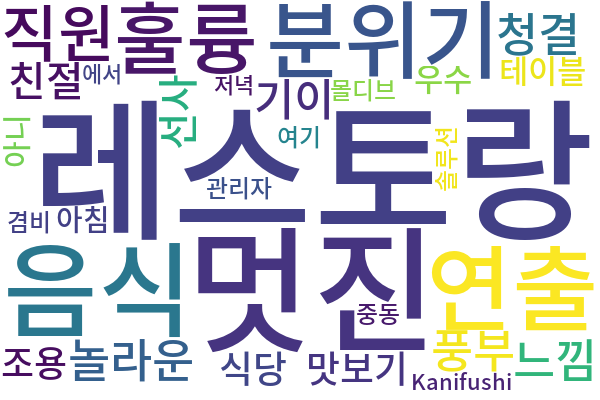

In [ ]:
service = get_n_grams(tags, "분위기", 2)
cnt = []
for n_gram in service:
  cnt += n_gram
cnt = Counter(cnt)
display_wc(cnt)

"음식" 키워드 주변엔 일반적으로 맛과 관련된 키워드가 나왔다. 이러한 결과는 예상이 가능하다.

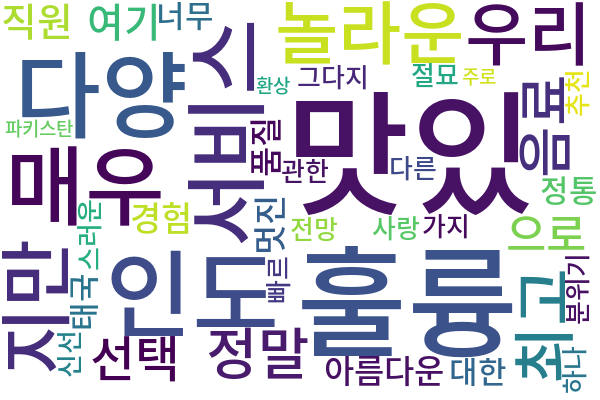

In [ ]:
service = get_n_grams(tags, "음식", 2)
cnt = []
for n_gram in service:
  cnt += n_gram
cnt = Counter(cnt)
display_wc(cnt)

리뷰를 레스토랑 별로 묶은 후 각 키워드의 레스토랑 별 빈도수를 확인해본다.

In [ ]:
each_review = defaultdict(str)
for key, val in data.items():
  for review in val:
    translated = review.split("(원문)")[0].strip()
    if translated == '':
      continue
    translated = translated.replace("(Google 번역 제공) ", "").replace("\n", "")
    if each_review[key] == "":
      each_review[key] = translated
    else:
      each_review[key] += " " + translated
      
each_review["M6M Restaurant"]

'멋진 전망과 매우 호화로운 메뉴. 어린이는 목요일과 월요일 점심에만 이용할 수 있지만 미리 예약할 가치가 있습니다. Ozen life Maadhoo 단지의 일부입니다. 내 인생 최고의 식사 경험 중 하나입니다.호텔에서 4 박 이상 숙박하는 경우 식사는 호텔 올 인 클루 시브 패키지에 포함되어 있습니다.음식은 훌륭했고 음료 선택은 인상적이었습니다.그러나 나를 더 놀라게 한 것은 전체 식사 동안 물고기를 보는 것입니다.나는 기본적으로 음식을 잊고 우리 앞에서 배회하는 상어와 모든 종류의 물고기를 보는 데 몇 시간을 보낼 수 있습니다.정말해야 할 일! 제 아내와 저는 식도락가이며 M6M의 음식 표준과 서비스 수준에 깜짝 놀랐습니다. 디테일과 풍미에 대한 관심은 두 번째입니다. 마늘 버터 데친 랍스터에서 캐비어까지 ... 음식은 놀랍게도 우리가 먹어 본 최고의 음식입니다. 헤드 웨이터 MOOSA는 전체 메뉴를 주문하는 한 가능한 모든 것을 보장합니다. 셰프 Letheesh는 우리가 먹어 본 가장 재능있는 셰프 중 한 명입니다. 천재. 나의 남편은 우리 신혼 여행 동안 몰디브에서 우리 지난 날에 놀람 점심을 위해 나를 데려 갔다. 그리고 그것은 우리들 쌍방을위한 놀랄만한 경험이었다!우리가 보트로 처음 도착한 이래로 직원들이 우리를 처음 돌봐 주었고, 도착시 샴페인을 주었고, 레스토랑이 오후 12시에 준비되기 전에 술집에 데려 갔고, 식당에 버기를 가져 갔고, 치즈 플래터를 먹었고, 수중 식당에 갔었습니다. 기대하지 않았다). 그리고 물고기가 우리 주변에서 수영했던 것을 보는 동안 놀랄만한 5 - 과정 점심을 먹었다!우리 각자는 다른 코스를 가질 수있게되어서 우리는 다른 것을 골랐다. 서로의 식사를 시도해 볼 수 있었다. 각 식사는 현지 해산물 및 수입 재료를 사용하여 조심스럽게 준비되었습니다. 초콜렛 구면에 개암 (hazelnut)과 초콜렛 케이크로 마무리했습니다. 서버가 따뜻한 녹은 초콜렛 소스를 부어 넣으면 녹습니다! 디저트를위한 셔벗을 먹었고 식사 후에 매우 상

리뷰에 "분위기" 키워드가 많이 탐색된 레스토랑으로는 "MRPR SEA"과 "Symphony Restaurant" 가 있다.

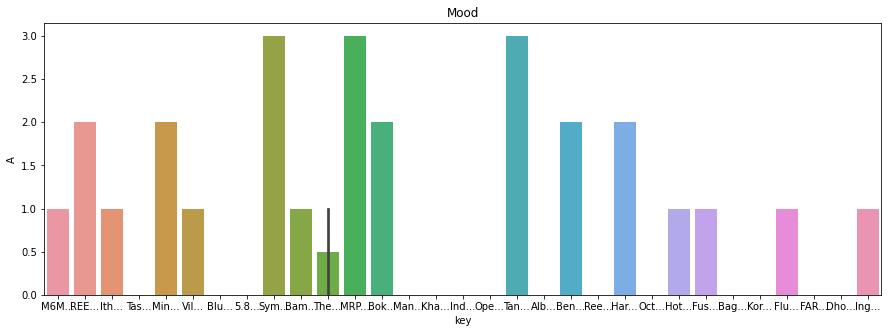

In [ ]:
keywords = ["분위기", "서비스"]
df = {
    "key": [],
    "A": [],
    "B": []
}
for key, val in each_review.items():
  each_tag = tokenizer.pos(val)
  cnt = Counter(x[0] for x in each_tag)
  df["key"].append(key[:3] + "...")
  df["A"].append(cnt["분위기"])
  df["B"].append(cnt["서비스"])

plt.figure(figsize=(15, 5))
sn.barplot(x="key", y="A", data=pd.DataFrame(df))
plt.title("Mood")
plt.show()

MRPR SEA [웹사이트](https://www.seaunderwaterrestaurant.com/?utm_source=GoogleMyBusiness&utm_medium=GMB&utm_term=SeaKihavahMaldives&utm_content=Home&utm_campaign=Google_GMB)

Symphony Restaurants [사진](https://www.google.com/search?q=symphony+restaurant+maldives&hl=ko&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiNkprVppP4AhVXgVYBHdC4DTAQ_AUoAXoECAIQAw&biw=1536&bih=760&dpr=1.25)

가장 많이 "서비스"에 관한 키워드가 많이 나온 레스토랑으론 "Fushi Cafe" 가 있다.

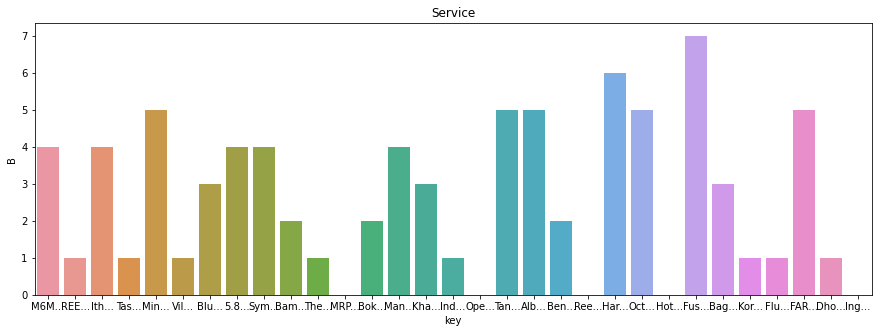

In [ ]:
plt.figure(figsize=(15, 5))
sn.barplot(x="key", y="B", data=pd.DataFrame(df))
plt.title("Service")
plt.show()

In [ ]:
data.keys()

dict_keys(['M6M Restaurant', 'REETHI RESTAURANT', 'Ithaa Undersea Restaurant', 'Tasting Table', 'Ministry of Crab Maldives', 'Vilu Restaurant %26 Bar', 'Blu, Niyama Private Islands Maldives', '5.8 Undersea Restaurant', 'Symphony Restaurant', 'Bamboo Resto', 'The Ledge by Dave Pynt', 'MRPL SEA', 'Bokkura Restaurant', 'Mandhoo Restaurant', 'Khanji Maldives', 'Indian Food Court', 'Open The Grill', 'Tandoori Flames Mal%C3%A9', 'Alba', 'Benjarong', 'Reef Restaurant', 'Hard Rock Cafe', 'Octopus Restaurant', 'Hot Rock', 'Fushi Cafe', 'Bageecha Restaurant', 'The Liquid', 'Korakali Restaurant', 'Fluid', 'FARU RESTAURANT', 'Dhonveli Restaurant', 'Inguru'])